Weather meta data - https://www.worldweatheronline.com/weather-api/api/docs/local-city-town-weather-api.aspx

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('merged_zones_weather_demand_data_2019.csv')

In [29]:
df.head(5)

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN


In [30]:
max(df['datetime'])

'2019-12-31T00'

In [31]:
min(df['datetime'])

'2019-06-05T17'

So data is existing from June 5th (5:00pm) to Dec 31st (12:00 am)

# Data Inspection

In [32]:
df.describe(include='all')

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
count,40000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000,40000.000000,40000,40000
unique,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,1,8
top,2019-06-05T17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ERCO - Coast,NaN,megawatthours,COAS
freq,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5000,NaN,40000,5000
mean,NaN,73.133950,9.619750,125.692850,0.088545,0.002878,61.745475,9.563275,5.665300,1015.205600,...,72.294475,15.403375,24.789575,23.912775,75.03605,3.581425,NaN,5871.242350,NaN,NaN
std,NaN,16.083323,4.153154,44.095889,0.514755,0.021236,18.543999,1.263779,0.875725,5.726129,...,17.590278,6.144169,9.886194,10.902926,19.62196,2.927155,NaN,5347.577271,NaN,NaN
min,NaN,21.000000,0.000000,113.000000,0.000000,0.000000,8.000000,0.000000,0.000000,998.000000,...,10.000000,1.000000,1.000000,-12.000000,10.00000,1.000000,NaN,605.000000,NaN,NaN
25%,NaN,62.000000,6.000000,113.000000,0.000000,0.000000,48.000000,10.000000,6.000000,1012.000000,...,62.000000,11.000000,17.000000,16.000000,62.00000,1.000000,NaN,1544.000000,NaN,NaN
50%,NaN,78.000000,9.000000,113.000000,0.000000,0.000000,63.000000,10.000000,6.000000,1014.000000,...,78.000000,15.000000,24.000000,27.000000,81.00000,1.000000,NaN,3619.000000,NaN,NaN
75%,NaN,85.000000,12.000000,116.000000,0.000000,0.000000,77.000000,10.000000,6.000000,1018.000000,...,85.000000,19.000000,31.000000,32.000000,90.00000,7.000000,NaN,9749.750000,NaN,NaN


In [33]:
df.dtypes

,0
datetime,object
tempF,int64
windspeedMiles,int64
weatherCode,int64
precipMM,float64
precipInches,float64
humidity,int64
visibility,int64
visibilityMiles,int64
pressure,int64


In [34]:
df['value-units'].unique()

array(['megawatthours'], dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         40000 non-null  object 
 1   tempF            40000 non-null  int64  
 2   windspeedMiles   40000 non-null  int64  
 3   weatherCode      40000 non-null  int64  
 4   precipMM         40000 non-null  float64
 5   precipInches     40000 non-null  float64
 6   humidity         40000 non-null  int64  
 7   visibility       40000 non-null  int64  
 8   visibilityMiles  40000 non-null  int64  
 9   pressure         40000 non-null  int64  
 10  pressureInches   40000 non-null  int64  
 11  cloudcover       40000 non-null  int64  
 12  HeatIndexC       40000 non-null  int64  
 13  HeatIndexF       40000 non-null  int64  
 14  DewPointC        40000 non-null  int64  
 15  DewPointF        40000 non-null  int64  
 16  WindChillC       40000 non-null  int64  
 17  WindChillF  

# Handling missing values

In [36]:
df.isnull().sum()

,0
datetime,0
tempF,0
windspeedMiles,0
weatherCode,0
precipMM,0
precipInches,0
humidity,0
visibility,0
visibilityMiles,0
pressure,0


No missing values

In [37]:
df[df.duplicated()]

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone


# Visualizations and Feature selection

In [38]:
df.head(16)

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN
5,2019-06-05T17,90,11,305,1.4,0.1,56,8,5,1007,...,90,18,29,38,100,7,ERCO - South,4510,megawatthours,SOUT
6,2019-06-05T17,86,7,113,0.0,0.0,40,10,6,1008,...,86,13,21,31,88,7,ERCO - West,1462,megawatthours,WEST
7,2019-06-05T17,76,10,176,0.3,0.0,85,10,6,1010,...,76,18,30,27,81,5,ERCO - East,1662,megawatthours,EAST
8,2019-06-05T18,82,4,116,0.0,0.0,72,9,5,1008,...,82,11,17,31,88,1,ERCO - South Central,8160,megawatthours,SCEN
9,2019-06-05T18,84,10,113,0.0,0.0,40,10,6,1007,...,84,14,23,31,87,1,ERCO - West,1544,megawatthours,WEST


In [39]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%dT%H")

In [40]:
df['Month'] = df['datetime'].dt.month_name()

In [41]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone,Month
0,2019-06-05 17:00:00,82,12,176,0.3,0.0,81,9,5,1008,...,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS,June
1,2019-06-05 17:00:00,85,6,113,0.0,0.0,25,10,6,1008,...,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES,June
2,2019-06-05 17:00:00,81,11,356,5.8,0.2,65,10,6,1009,...,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN,June
3,2019-06-05 17:00:00,84,6,116,0.0,0.0,62,10,6,1008,...,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH,June
4,2019-06-05 17:00:00,84,4,116,0.0,0.0,68,9,5,1008,...,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN,June


## Average demand by Location

In [42]:
subba_group = df.groupby('subba-name')

In [43]:
avg_demand_subba = subba_group['value'].mean().sort_values(ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ERCO - North Central'),
  Text(1, 0, 'ERCO - Coast'),
  Text(2, 0, 'ERCO - South Central'),
  Text(3, 0, 'ERCO - South'),
  Text(4, 0, 'ERCO - Far West'),
  Text(5, 0, 'ERCO - East'),
  Text(6, 0, 'ERCO - West'),
  Text(7, 0, 'ERCO - North')])

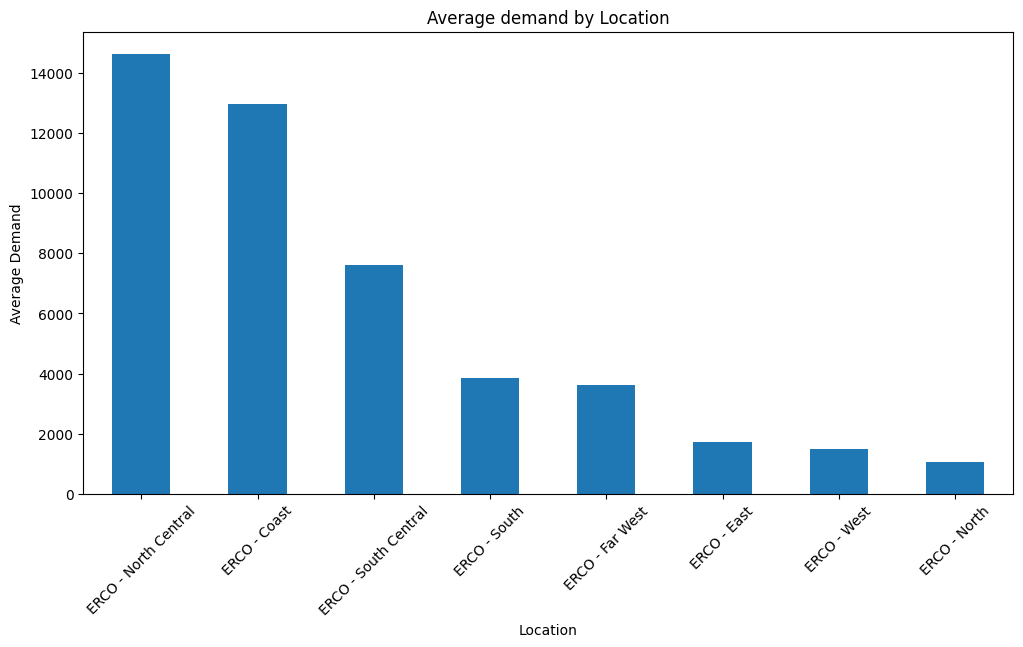

In [44]:
plt.figure(figsize=(12,6))
avg_demand_subba.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average Demand')
plt.title('Average demand by Location')
plt.xticks(rotation = 45)

## Average Demand per Month

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'August'),
  Text(1, 0, 'December'),
  Text(2, 0, 'July'),
  Text(3, 0, 'June'),
  Text(4, 0, 'November'),
  Text(5, 0, 'October'),
  Text(6, 0, 'September')])

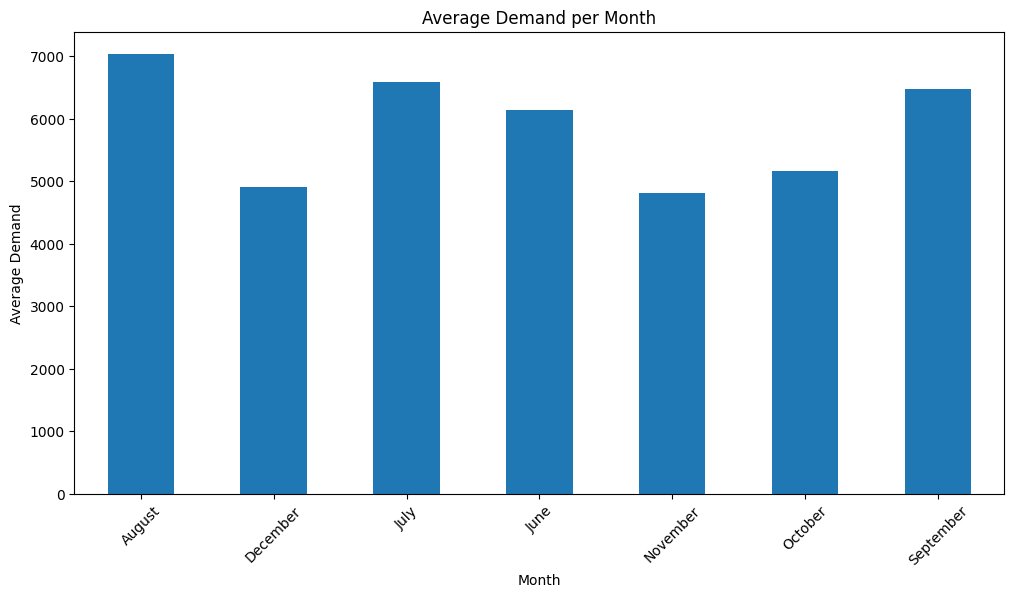

In [45]:
month_demand_group = df.groupby('Month')
avg_demand_month = month_demand_group['value'].mean()

plt.figure(figsize = (12,6))
avg_demand_month.plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand per Month')
plt.xticks(rotation = 45)

## Correlation between Weather Factors and Demand Value

In [46]:
df.columns

Index(['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM',
       'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name',
       'value', 'value-units', 'zone', 'Month'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between Weather Factors and Demand Value')

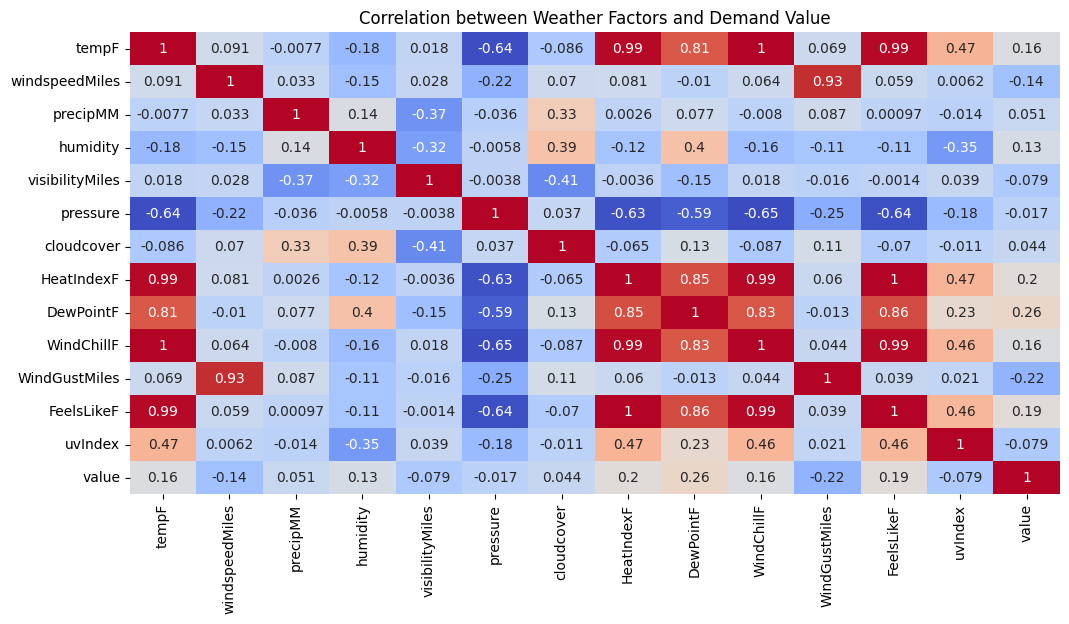

In [47]:
weather_factors_value = df[['tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'value']]
weather_corr = weather_factors_value.corr()

plt.figure(figsize = (12,6))
sns.heatmap(weather_corr, annot = True, cmap = 'coolwarm', cbar=False)
plt.title('Correlation between Weather Factors and Demand Value')

Looking at the plot - it can be decided to drop
1. 'DewPointF', 'WindChillF', 'HeatIndexF', 'FeelsLikeF' and 'tempF' - are highly correlated
2. 'windspeedMiles' and 'WindGustMiles' are also highly correlated with each other

Considering how they are correlated with the target variable ('Value') - we will drop few features

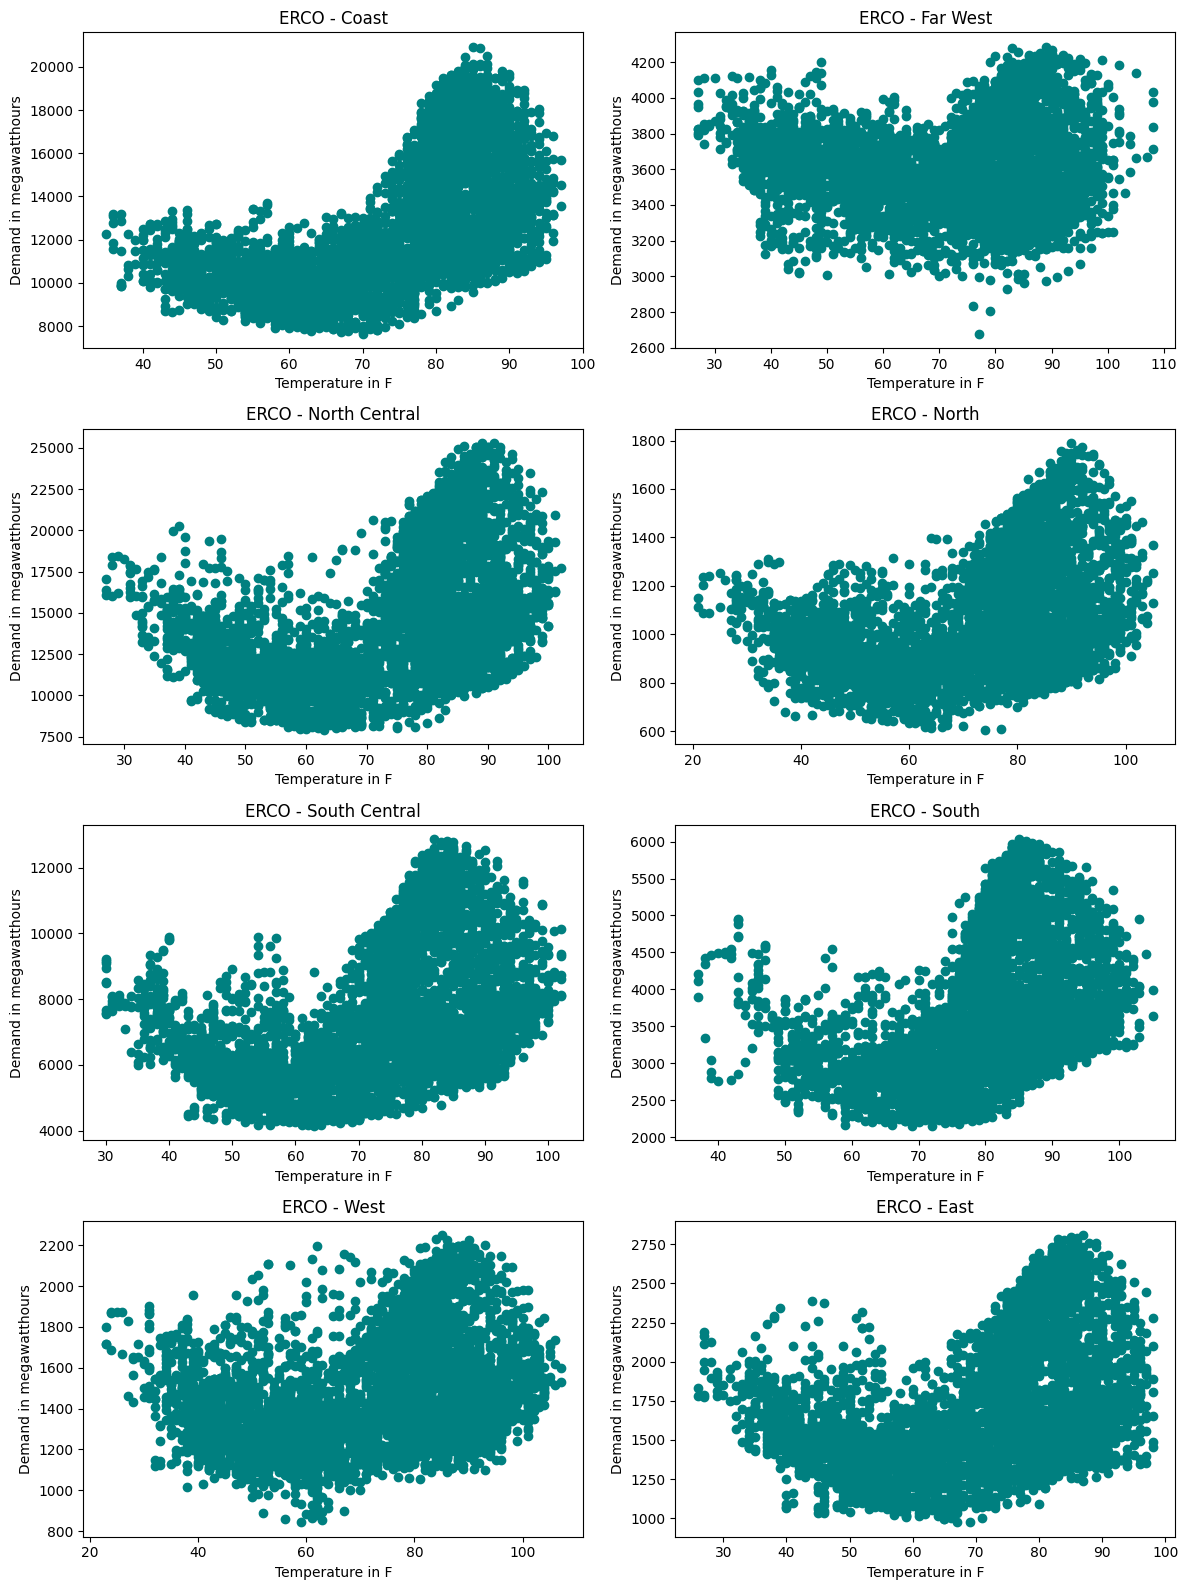

In [48]:
fig, axes = plt.subplots(4,2, figsize = (12,16))

locations = df['subba-name'].unique()
axes = axes.flatten()

for i in range(len(locations)):
  loc_data = df[df['subba-name'] == locations[i]]
  axes[i].scatter(loc_data['tempF'], loc_data['value'], color = 'teal')
  axes[i].set_title(locations[i])
  axes[i].set_xlabel('Temperature in F')
  axes[i].set_ylabel('Demand in megawatthours')
plt.tight_layout()

Should look into ERCO - Far West

## Variance Inflation Factor (VIF)

In [49]:
from statsmodels.stats. outliers_influence import variance_inflation_factor

features = weather_factors_value.drop(columns=['value'])
vif_data = pd.DataFrame()
vif_data['features'] = features.columns

vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data

,features,VIF
0,tempF,22560.575137
1,windspeedMiles,50.509356
2,precipMM,1.273041
3,humidity,186.349986
4,visibilityMiles,58.597255
5,pressure,396.494471
6,cloudcover,2.682880
7,HeatIndexF,19272.113881
8,DewPointF,727.950388
9,WindChillF,18693.891987


1. Very High VIF - tempF, HeatIndexF, WindChillF, FeelsLikeF
2. Moderate VIF - windspeedMiles, humidity, visibilityMiles,pressure, DewPointF, WindGustMiles
3. Low VIF - precipMM, cloudcover, uvindex


So the columns initially which can be considered are - 'datetime', 'tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'subba-name','value', 'value-units', 'zone', 'Month' - Dropping selected columns as few features are captured in different units


The rest few columns to be dropped is yet to be decided based on other factors